# Object_Detection

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tiny-object-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3964385%2F7248384%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240709%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240709T121503Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D989fcc1f6ed770bfe2f3328df664650a4858334b20f6fa87b5c425e84bce3ef85d85368eac77da86fc8a11e2ae758e9ff9fda0805bb35b676145af07fad28a3571ffb8cc815ce648d11bf39bb61e75e2638102fb266b89d9117f13cc3bb7c9d04043e7755fc338e6d7f948f753bd80b2219b439fd8eb5550e5130cd3a93e1dba1fa647211f010ff75ea7a53cf552ac062e9131852a7047f70c5c728b37fc812773110e0f459c3750c482b33e3075ff374fcae0645e74f0cb04c098565492207f1c3380efd2c08dcfc88bd7f4aad30f2e970cb7d326ae51a269c7715cb1919dd7855931d9f3440798beaf43f63de1a0ad182c0f356cff147664ee2ff0db53daea'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 187688132 bytes downloaded
Downloaded and uncompressed: tiny-object-detection
Data source import complete.


# Exploratory Data Analysis


In [ ]:
!pip install pycocotools --quiet

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed

import pandas as pd # data processing
from pycocotools.coco import COCO
import json # load json annotations

# Data Visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize the COCO API with your annotations file
SkyFusion_ann = open(r"/kaggle/input/tiny-object-detection/SkyFusion/train/_annotations.coco.json")
SkyFusion_COCO = json.load(SkyFusion_ann)

SkyFusion_train = pd.DataFrame(SkyFusion_COCO['annotations'])
SkyFusion_train.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,3,"[259, 49, 4.8, 9.6]",46.08,"[[264, 48.8, 259.2, 48.8, 259.2, 58.4, 264, 58...",0
1,1,0,3,"[284, 630, 4.8, 8.8]",42.24,"[[288.8, 630.4, 284, 630.4, 284, 639.2, 288.8,...",0
2,2,0,3,"[281, 568, 4, 8.8]",35.20,"[[284.8, 568, 280.8, 568, 280.8, 576.8, 284.8,...",0
3,3,0,3,"[288, 570, 4.8, 10.4]",49.92,"[[292.8, 569.6, 288, 569.6, 288, 580, 292.8, 5...",0
4,4,0,3,"[303, 553, 4.8, 9.6]",46.08,"[[308, 552.8, 303.2, 552.8, 303.2, 562.4, 308,...",0


# Distributin of Object Instances


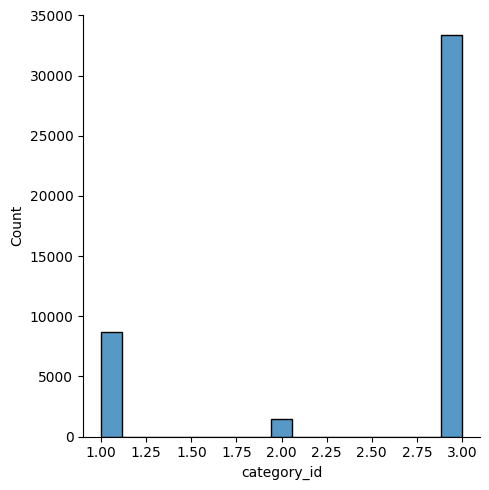

In [ ]:
sns.displot(SkyFusion_train['category_id'])

In [ ]:
SkyFusion_ann = open(r"/kaggle/input/tiny-object-detection/SkyFusion/valid/_annotations.coco.json")
SkyFusion_COCO = json.load(SkyFusion_ann)

SkyFusion_valid = pd.DataFrame(SkyFusion_COCO['annotations'])
SkyFusion_valid.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[256, 131, 33.5, 31]",1038.50,[],0
1,1,0,1,"[261, 93, 38, 28]",1064.00,[],0
2,2,0,1,"[275, 53, 39, 30.5]",1189.50,[],0
3,3,0,1,"[300, 16, 38.5, 29]",1116.50,[],0
4,4,0,1,"[185, 5, 32.5, 29.5]",958.75,[],0


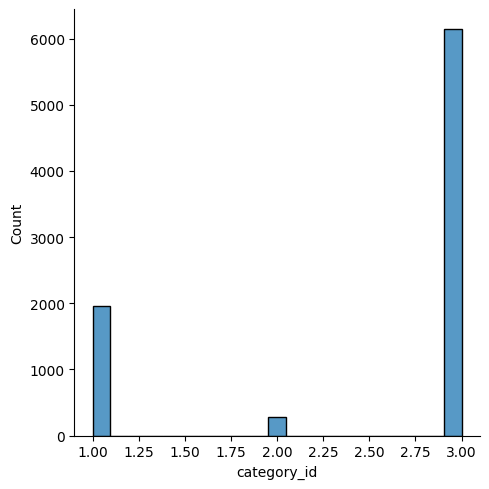

In [ ]:
sns.displot(SkyFusion_valid['category_id'])

In [ ]:
SkyFusion_ann = open(r"/kaggle/input/tiny-object-detection/SkyFusion/test/_annotations.coco.json")
SkyFusion_COCO = json.load(SkyFusion_ann)

SkyFusion_test = pd.DataFrame(SkyFusion_COCO['annotations'])
SkyFusion_test.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,2,"[411, 566, 18.4, 10.4]",191.36,"[[429.6, 566.4, 411.2, 566.4, 411.2, 576.8, 42...",0
1,1,0,2,"[199, 546, 12, 8]",96.00,"[[211.2, 545.6, 199.2, 545.6, 199.2, 553.6, 21...",0
2,2,0,2,"[205, 532, 12.8, 5.6]",71.68,"[[217.6, 532, 204.8, 532, 204.8, 537.6, 217.6,...",0
3,3,0,2,"[330, 554, 11.2, 16]",179.20,"[[341.6, 554.4, 330.4, 554.4, 330.4, 570.4, 34...",0
4,4,0,2,"[242, 566, 10.4, 6.4]",66.56,"[[252.8, 566.4, 242.4, 566.4, 242.4, 572.8, 25...",0


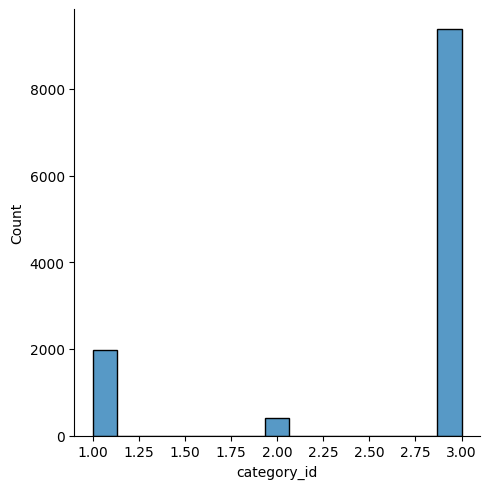

In [ ]:
sns.displot(SkyFusion_test['category_id'])

In [ ]:
def mean_area_of_objects(data_frame):
    print(data_frame['area'].mean())


mean_area_of_objects(SkyFusion_train)
mean_area_of_objects(SkyFusion_test)
mean_area_of_objects(SkyFusion_valid)

468.30196612736665
398.6491524125607
493.95325146059383


# Image count per class



In [ ]:
def image_count_per_class(file_path):

    # Initialize the COCO API with your annotations file
    sampled_coco = COCO(file_path)

    # Get the category names from the COCO dataset
    coco_category_names = [cat['name'] for cat in sampled_coco.loadCats(sampled_coco.getCatIds())]

    object_class_count = {}

    # Create a set to keep track of image IDs counted for each class
    image_ids_counted = {category_name: set() for category_name in coco_category_names}

    # Iterate over all categories (object classes) in the COCO dataset
    for category in sampled_coco.cats.values():
        category_id = category['id']
        category_name = category['name']

        # Get the image IDs associated with this object class
        image_ids = sampled_coco.getImgIds(catIds=category_id)

        # Count the number of images exclusively associated with this object class
        exclusive_image_count = 0

        for image_id in image_ids:
            # Check if this image has not been counted for any other class
            if all(image_id not in image_ids_counted[other_category] for other_category in coco_category_names if other_category != category_name):
                exclusive_image_count += 1
                # Mark the image as counted for this class
                image_ids_counted[category_name].add(image_id)

        object_class_count[category_name] = exclusive_image_count

    return object_class_count

In [ ]:
# Print the image count for each class
train_ann = "/kaggle/input/tiny-object-detection/SkyFusion/train/_annotations.coco.json"
object_class_count = image_count_per_class(train_ann)
for category_name, image_count in object_class_count.items():
    print(f"{category_name}: {image_count} images exclusively")

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
Aircraft: 700 images exclusively
ship: 696 images exclusively
vehicle: 698 images exclusively


In [ ]:
# Print the image count for each class
train_ann = "/kaggle/input/tiny-object-detection/SkyFusion/valid/_annotations.coco.json"
object_class_count = image_count_per_class(train_ann)
for category_name, image_count in object_class_count.items():
    print(f"{category_name}: {image_count} images exclusively")

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Aircraft: 149 images exclusively
ship: 150 images exclusively
vehicle: 150 images exclusively


In [ ]:
# Print the image count for each class
train_ann = "/kaggle/input/tiny-object-detection/SkyFusion/test/_annotations.coco.json"
object_class_count = image_count_per_class(train_ann)
for category_name, image_count in object_class_count.items():
    print(f"{category_name}: {image_count} images exclusively")

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Aircraft: 149 images exclusively
ship: 150 images exclusively
vehicle: 150 images exclusively


# Visualizing image count

In [ ]:
def image_count(df):
    image_count = []
    for i in range(1,4):
        image_ids = set(df['image_id'][df['category_id']==i].values.squeeze().tolist())
        image_count.append(len(image_ids))

    return image_count

classes = ['Aircraft','Ship','Vechicle']

train = image_count(SkyFusion_train)
valid = image_count(SkyFusion_valid)
test = image_count(SkyFusion_test)

Text(0.5, 1.0, 'valid')

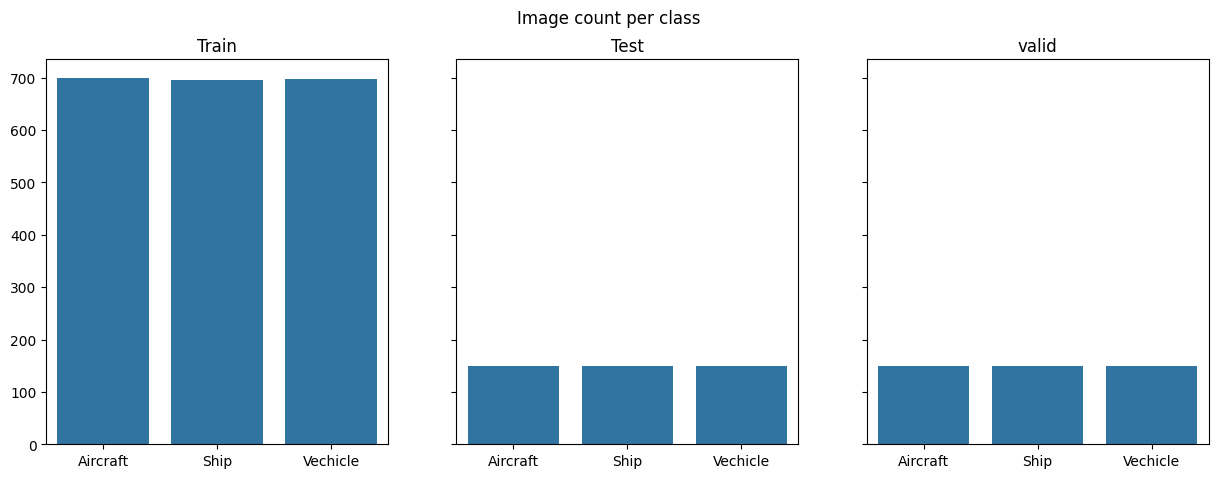

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Image count per class')

sns.barplot(ax=axes[0], y=train, x=classes)
axes[0].set_title("Train")

sns.barplot(ax=axes[1], y=test, x=classes)
axes[1].set_title("Test")

sns.barplot(ax=axes[2], y=valid, x=classes)
axes[2].set_title("valid")

# Preprocessing and Feature extraction

In [ ]:
import os
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_coco_data(base_path, annotation_file):
    # Load annotations
    with open(annotation_file) as f:
        annotations = json.load(f)

    images = []
    labels = []

    # Create a dictionary to map image_id to filename
    id_to_filename = {image['id']: image['file_name'] for image in annotations['images']}

    for ann in annotations['annotations']:
        image_id = ann['image_id']
        filename = id_to_filename[image_id]  # Get filename from the mapping
        image_path = os.path.join(base_path, filename)
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)
        images.append(image)
        labels.append(ann['category_id'])

    # Convert to numpy arrays and normalize
    images = np.array(images, dtype=np.float32) / 255.0
    labels = np.array(labels)

    return images, labels

# Load training and testing data
train_images, train_labels = load_coco_data('/kaggle/input/tiny-object-detection/SkyFusion/train',
                                            '/kaggle/input/tiny-object-detection/SkyFusion/train/_annotations.coco.json')
test_images, test_labels = load_coco_data('/kaggle/input/tiny-object-detection/SkyFusion/test',
                                          '/kaggle/input/tiny-object-detection/SkyFusion/test/_annotations.coco.json')


In [ ]:
# Combine train and test for sampling
all_images = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)
# Sample 100 images
np.random.seed(42)
indices = np.random.choice(len(all_images), 2500, replace=False)
sampled_images = all_images[indices]
sampled_labels = all_labels[indices]

# Split the sampled data into 70% train and 30% test
train_images, val_images, train_labels, val_labels = train_test_split(sampled_images, sampled_labels, test_size=0.3, random_state=42)

print(f"Training data shape: {train_images.shape}")
print(f"Validation data shape: {val_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Training data shape: (1750, 224, 224, 3)
Validation data shape: (750, 224, 224, 3)
Training labels shape: (1750,)
Validation labels shape: (750,)


In [ ]:
# Checking the unique labels in the dataset
unique_labels = np.unique(train_labels)
print(f"Unique labels in the training data: {unique_labels}")

num_classes = unique_labels.size
print(f"Number of classes: {num_classes}")


Unique labels in the training data: [1 2 3]
Number of classes: 3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remap the labels to the range [0, num_classes - 1)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

# Update num_classes after remapping
num_classes = np.unique(train_labels).size
print(f"Updated number of classes: {num_classes}")


Updated number of classes: 3


#Models Training

 # DenseNet

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121

def create_model(num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(num_classes)

# Train the model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=5, batch_size=1)


Epoch 1/5
70/70 [==============================] - 14s 126ms/step - loss: 1.1485 - accuracy: 0.8143 - val_loss: 0.5518 - val_accuracy: 0.9000
Epoch 2/5
70/70 [==============================] - 7s 98ms/step - loss: 0.3591 - accuracy: 0.8571 - val_loss: 0.6923 - val_accuracy: 0.7333
Epoch 3/5
70/70 [==============================] - 7s 100ms/step - loss: 0.0531 - accuracy: 0.9857 - val_loss: 0.4480 - val_accuracy: 0.8667
Epoch 4/5
70/70 [==============================] - 7s 100ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.9000
Epoch 5/5
70/70 [==============================] - 7s 102ms/step - loss: 0.1058 - accuracy: 0.9571 - val_loss: 0.9291 - val_accuracy: 0.6333


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


3/3 [==============================] - 1s 385ms/step
 Accuracy: 0.9286
 Precision: 0.9464
 Recall: 0.9286
 F1 Score: 0.9319
[[15  0  0]
 [ 0  1  0]
 [ 5  0 49]]


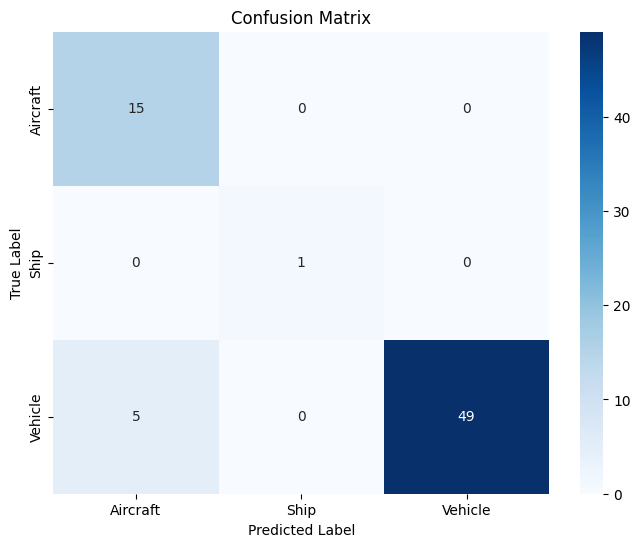

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


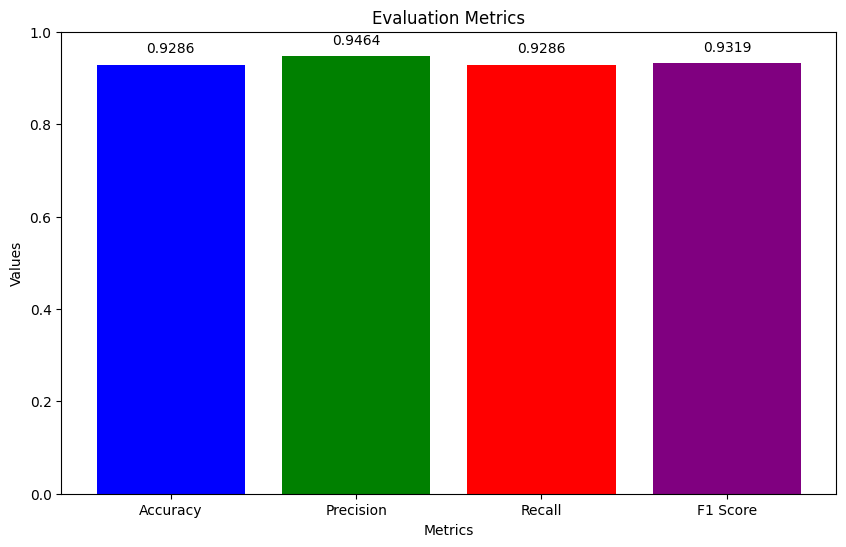

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


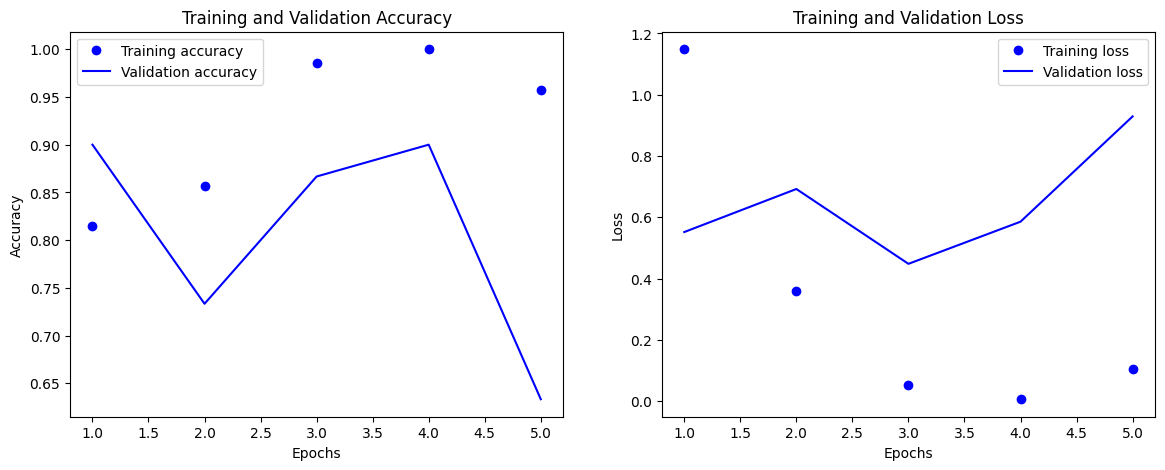

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy and loss
def plot_training_history(history):
    # Get the training and validation accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)

#lenet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def create_lenet(input_shape, num_classes):
    model = Sequential([
        Conv2D(6, kernel_size=(3, 3), activation='tanh', input_shape=input_shape),
        AveragePooling2D(),
        Conv2D(16, kernel_size=(3, 3), activation='tanh'),
        AveragePooling2D(),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)

lenet_model = create_lenet(input_shape, num_classes)
lenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lenet_history = lenet_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=32)


Epoch 1/5
55/55 [==============================] - 26s 466ms/step - loss: 0.6327 - accuracy: 0.8017 - val_loss: 0.6022 - val_accuracy: 0.7980
Epoch 2/5
55/55 [==============================] - 17s 312ms/step - loss: 0.5923 - accuracy: 0.8034 - val_loss: 0.5981 - val_accuracy: 0.7980
Epoch 3/5
55/55 [==============================] - 18s 323ms/step - loss: 0.6018 - accuracy: 0.8034 - val_loss: 0.5961 - val_accuracy: 0.7980
Epoch 4/5
55/55 [==============================] - 18s 328ms/step - loss: 0.5954 - accuracy: 0.8034 - val_loss: 0.5972 - val_accuracy: 0.7980
Epoch 5/5
55/55 [==============================] - 18s 323ms/step - loss: 0.5932 - accuracy: 0.8034 - val_loss: 0.6121 - val_accuracy: 0.7980


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = lenet_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


11/11 [==============================] - 0s 26ms/step
 Accuracy: 0.8200
 Precision: 0.6724
 Recall: 0.8200
 F1 Score: 0.7389
[[  0   0  54]
 [  0   0   9]
 [  0   0 287]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


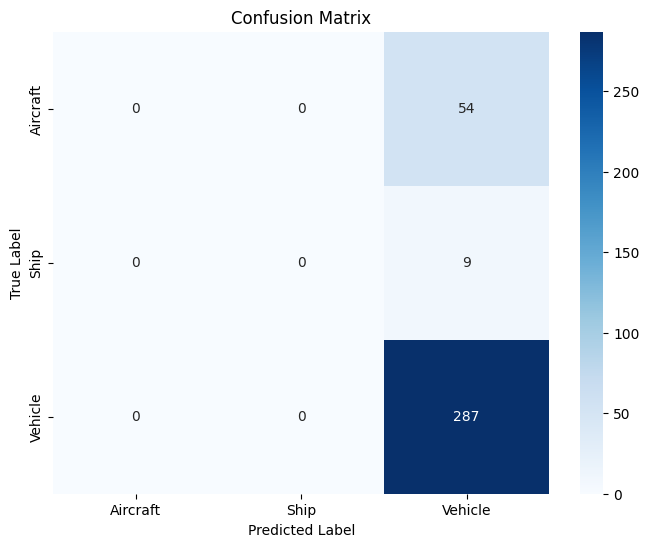

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


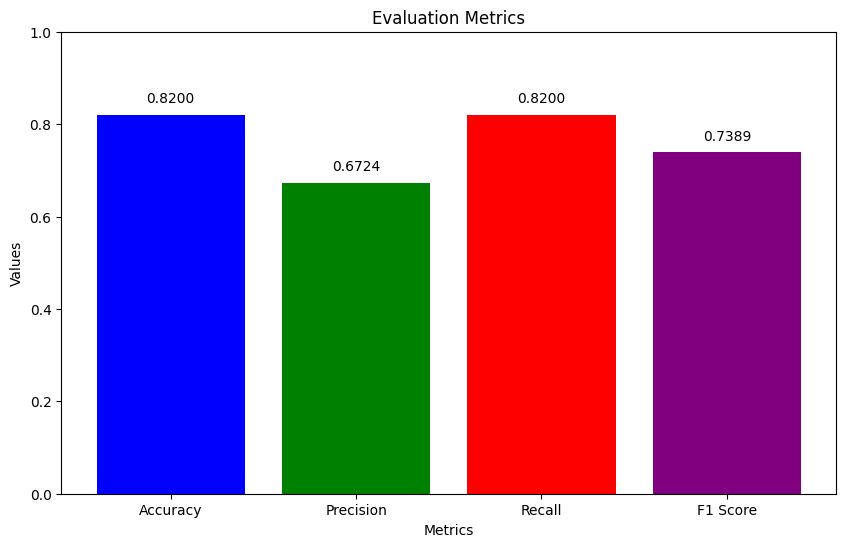

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


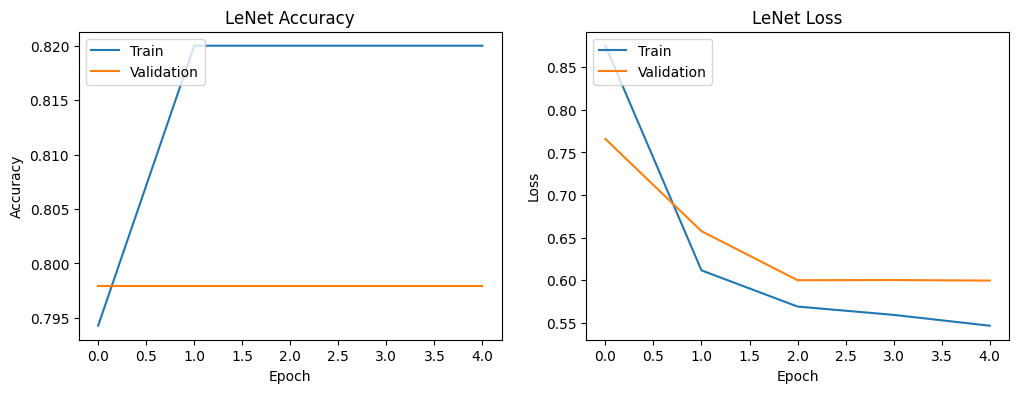

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_history(lenet_history, 'LeNet')


# alexnet

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

def create_alexnet(input_shape, num_classes):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11, 11), strides=(4, 4), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

    # Flatten the layers
    model.add(Flatten())

    # 1st Fully Connected Layer
    model.add(Dense(4096, input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
alexnet_model = create_alexnet(input_shape, num_classes)
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
alexnet_history = alexnet_model.fit(train_images, train_labels, validation_data=(train_images, train_labels), epochs=5, batch_size=32)


NameError: name 'input_shape' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = alexnet_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


9/9 [==============================] - 1s 64ms/step
 Accuracy: 0.7857
 Precision: 0.6173
 Recall: 0.7857
 F1 Score: 0.6914
[[  0   0  44]
 [  0   0  16]
 [  0   0 220]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


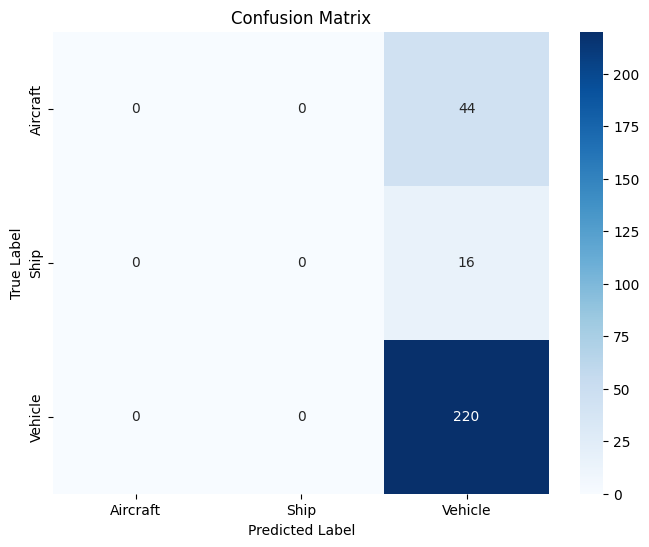

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


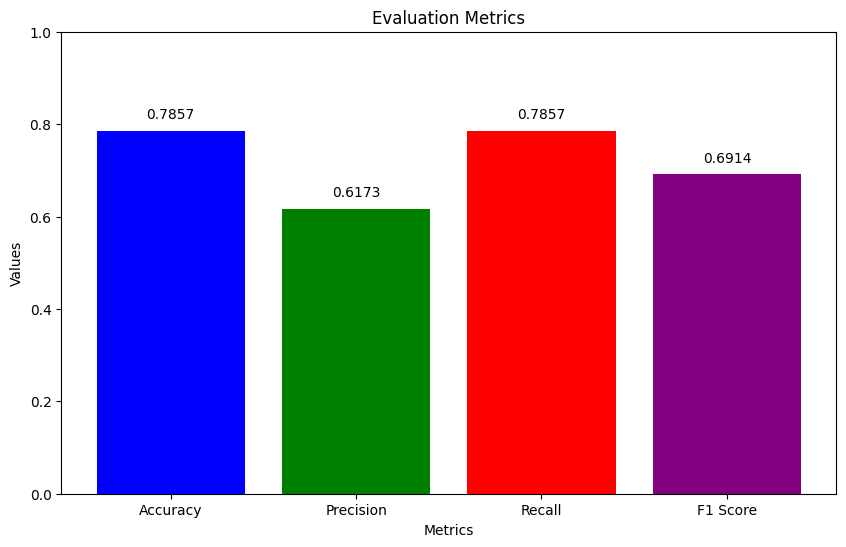

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


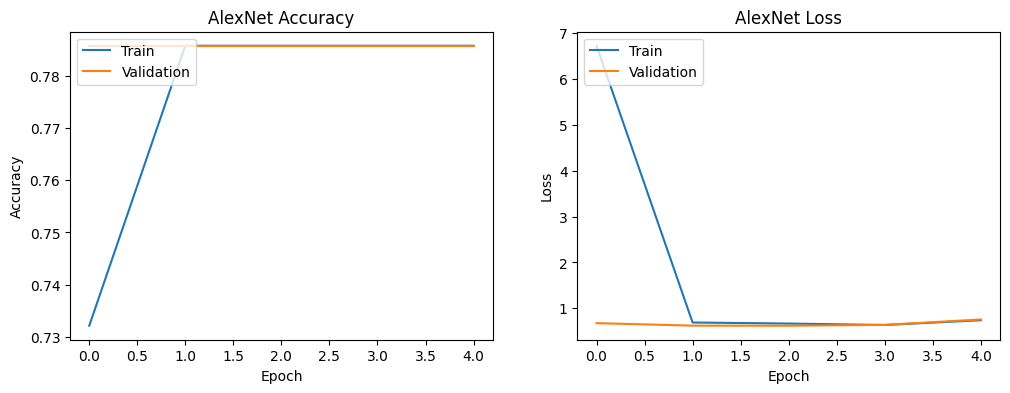

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_history(alexnet_history, 'AlexNet')


# googlenet

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, DenseNet121, InceptionV3, VGG16

def create_googlenet(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

googlenet_model = create_googlenet(input_shape, num_classes)
googlenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
googlenet_history = googlenet_model.fit(train_images, train_labels, validation_data=(train_images, train_labels), epochs=5, batch_size=128)


Epoch 1/5
5/5 [==============================] - 83s 16s/step - loss: 32.2412 - accuracy: 0.5964 - val_loss: 1.1475 - val_accuracy: 0.7911
Epoch 2/5
5/5 [==============================] - 81s 16s/step - loss: 0.8392 - accuracy: 0.7911 - val_loss: 0.5819 - val_accuracy: 0.7911
Epoch 3/5
5/5 [==============================] - 81s 16s/step - loss: 0.6733 - accuracy: 0.7911 - val_loss: 0.5985 - val_accuracy: 0.7911
Epoch 4/5
5/5 [==============================] - 81s 16s/step - loss: 0.6086 - accuracy: 0.7911 - val_loss: 0.6216 - val_accuracy: 0.7911
Epoch 5/5
5/5 [==============================] - 81s 16s/step - loss: 0.6114 - accuracy: 0.7911 - val_loss: 0.5826 - val_accuracy: 0.7911


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = googlenet_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


18/18 [==============================] - 10s 551ms/step
 Accuracy: 0.7911
 Precision: 0.6258
 Recall: 0.7911
 F1 Score: 0.6988
[[  0   0  93]
 [  0   0  24]
 [  0   0 443]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


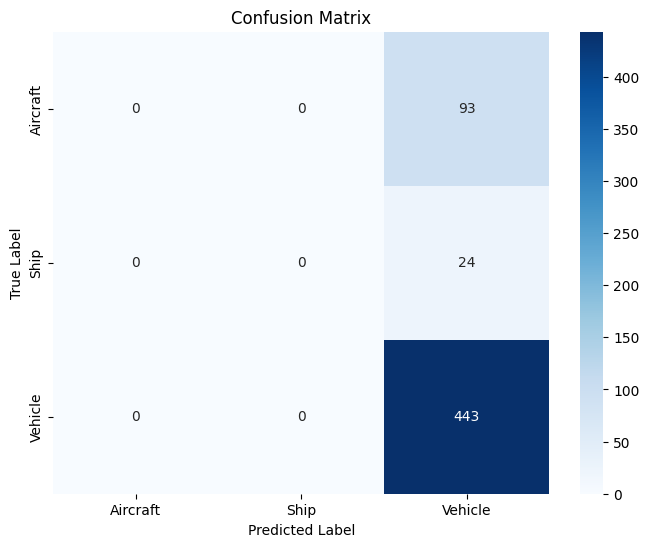

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


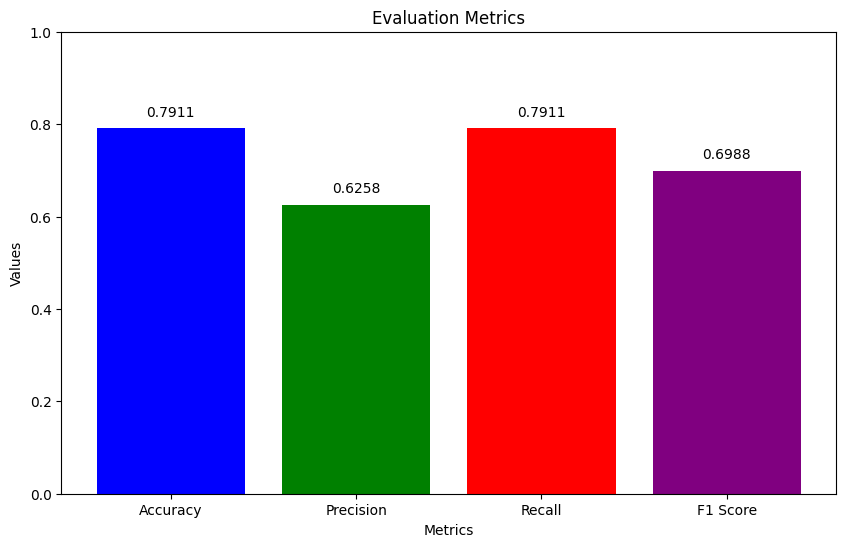

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


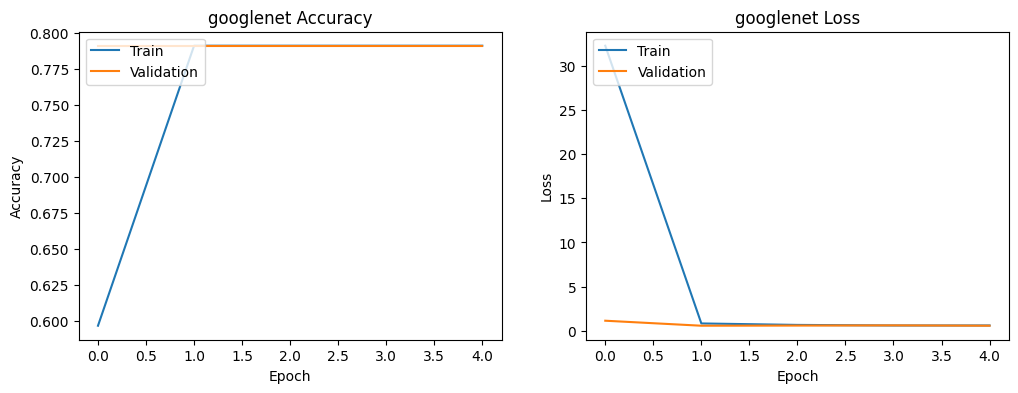

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_history(googlenet_history, 'googlenet')


# vggnet

In [ ]:
def create_vggnet(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

vggnet_model = create_vggnet(input_shape, num_classes)
vggnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggnet_history = vggnet_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=5, batch_size=12)


Epoch 1/5
6/6 [==============================] - 13s 2s/step - loss: 5.9800 - accuracy: 0.5571 - val_loss: 0.8898 - val_accuracy: 0.8333
Epoch 2/5
6/6 [==============================] - 11s 2s/step - loss: 0.7568 - accuracy: 0.6857 - val_loss: 0.6775 - val_accuracy: 0.8333
Epoch 3/5
6/6 [==============================] - 11s 2s/step - loss: 0.6078 - accuracy: 0.7714 - val_loss: 0.9575 - val_accuracy: 0.8333
Epoch 4/5
6/6 [==============================] - 11s 2s/step - loss: 0.7713 - accuracy: 0.7714 - val_loss: 0.8305 - val_accuracy: 0.8333
Epoch 5/5
6/6 [==============================] - 11s 2s/step - loss: 0.7380 - accuracy: 0.7714 - val_loss: 1.2157 - val_accuracy: 0.8333


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = vggnet_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


3/3 [==============================] - 1s 375ms/step
 Accuracy: 0.7714
 Precision: 0.5951
 Recall: 0.7714
 F1 Score: 0.6719
[[ 0  0 15]
 [ 0  0  1]
 [ 0  0 54]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


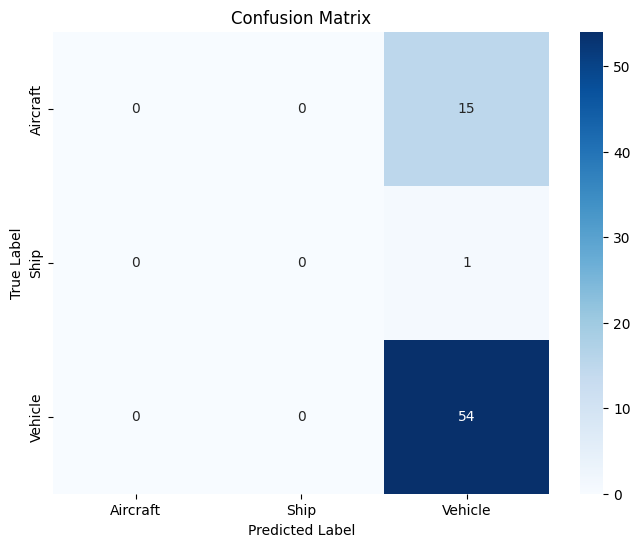

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


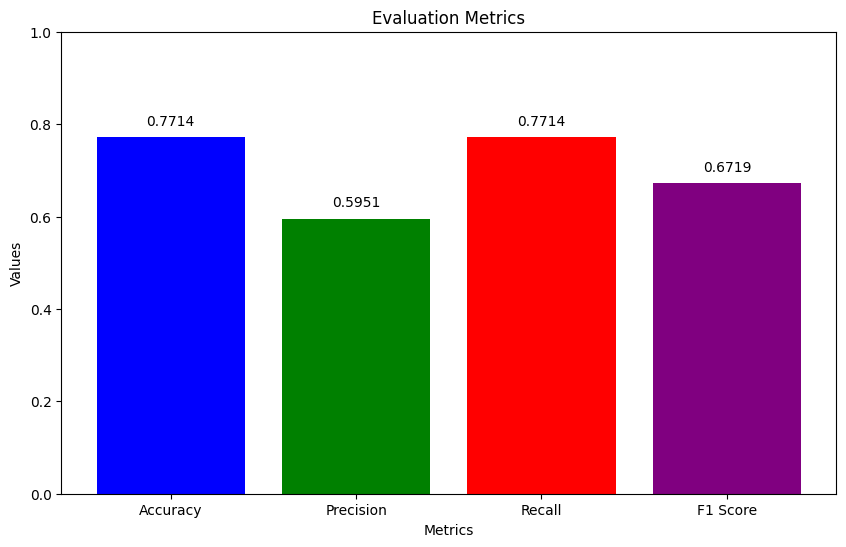

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


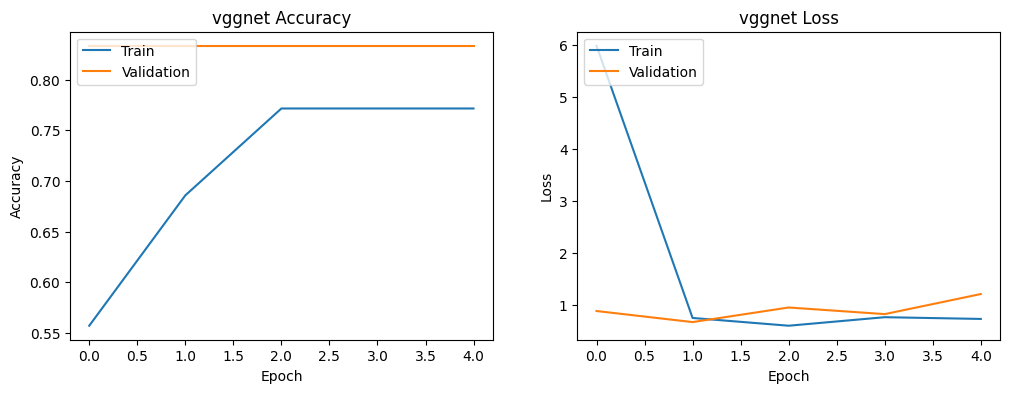

In [ ]:
plot_training_history(vggnet_history, 'vggnet')

# zfnet

In [ ]:
def create_zfnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(96, (7, 7), strides=2, activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

zfnet_model = create_zfnet(input_shape, num_classes)
zfnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
zfnet_history = zfnet_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=5, batch_size=64)


Epoch 1/5
8/8 [==============================] - 22s 3s/step - loss: 15.4862 - accuracy: 0.5388 - val_loss: 0.6175 - val_accuracy: 0.8095
Epoch 2/5
8/8 [==============================] - 21s 3s/step - loss: 0.6372 - accuracy: 0.7735 - val_loss: 0.6790 - val_accuracy: 0.8095
Epoch 3/5
8/8 [==============================] - 20s 3s/step - loss: 0.6574 - accuracy: 0.7735 - val_loss: 0.5668 - val_accuracy: 0.8095
Epoch 4/5
8/8 [==============================] - 21s 3s/step - loss: 0.6331 - accuracy: 0.7735 - val_loss: 0.6015 - val_accuracy: 0.8095
Epoch 5/5
8/8 [==============================] - 21s 3s/step - loss: 0.6006 - accuracy: 0.7735 - val_loss: 0.5429 - val_accuracy: 0.8095


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = zfnet_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


16/16 [==============================] - 3s 187ms/step
 Accuracy: 0.7735
 Precision: 0.5983
 Recall: 0.7735
 F1 Score: 0.6747
[[  0   0  94]
 [  0   0  17]
 [  0   0 379]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


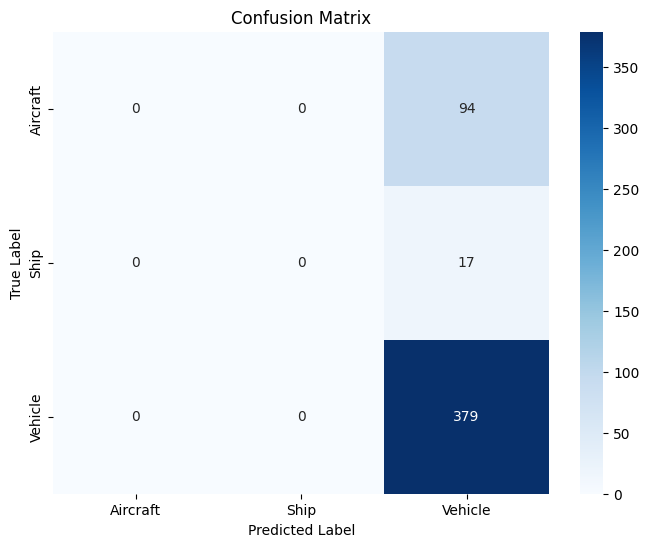

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


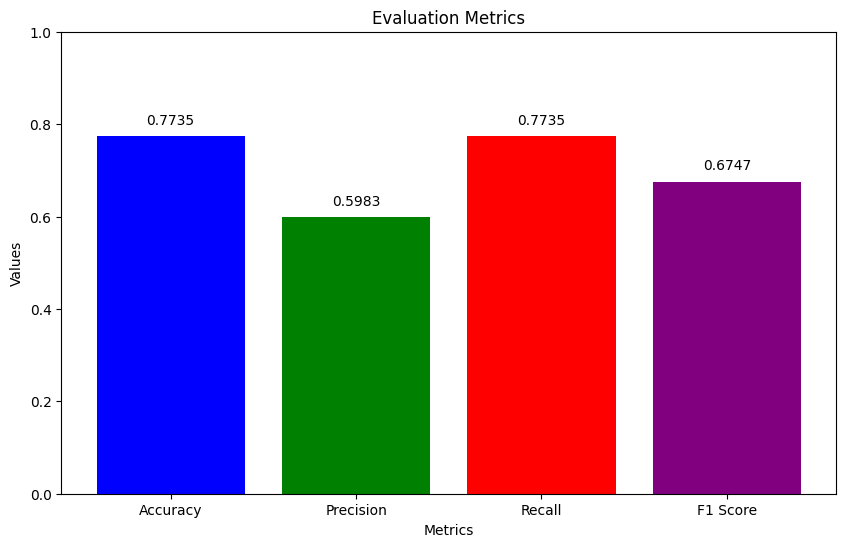

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


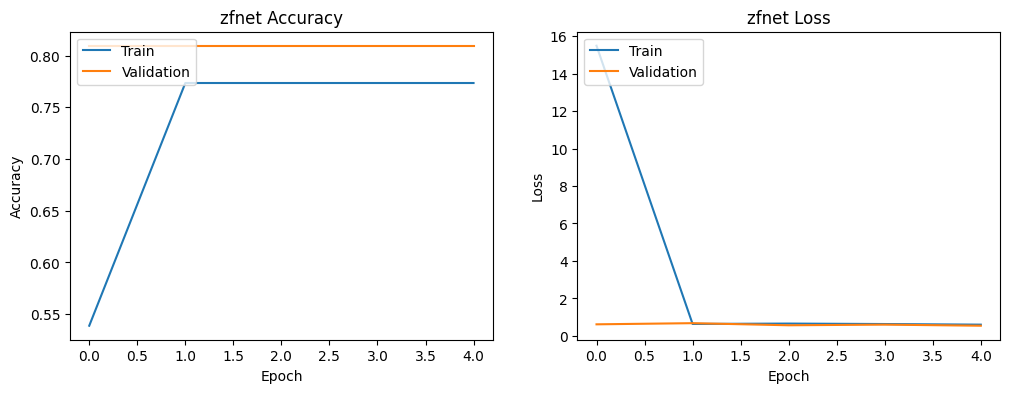

In [ ]:
plot_training_history(zfnet_history, 'zfnet')

# resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

def create_resnet50(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model
# Train ResNet50 and store history
resnet50_model = create_resnet50(input_shape, num_classes)
resnet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=5, batch_size=32)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
14/14 [==============================] - 49s 2s/step - loss: 0.2702 - accuracy: 0.9119 - val_loss: 1819.9082 - val_accuracy: 0.7833
Epoch 2/5
14/14 [==============================] - 29s 2s/step - loss: 0.2414 - accuracy: 0.9643 - val_loss: 282059.0938 - val_accuracy: 0.7833
Epoch 3/5
14/14 [==============================] - 30s 2s/step - loss: 0.2266 - accuracy: 0.9190 - val_loss: 155391024.0000 - val_accuracy: 0.7833
Epoch 4/5
14/14 [==============================] - 30s 2s/step - loss: 0.2188 - accuracy: 0.9714 - val_loss: 1008745.6250 - val_accuracy: 0.7833
Epoch 5/5
14/14 [==============================] - 29s 2s/step - loss: 0.1460 - accuracy: 0.9595 - val_loss: 72507.6562 - val_accuracy: 0.7833


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict on the training data
train_predictions = resnet50_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)

# Calculate metrics
train_accuracy = accuracy_score(train_labels, train_predicted_labels)
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
train_f1 = f1_score(train_labels, train_predicted_labels, average='weighted')
cm = confusion_matrix(train_labels, train_predicted_labels)

# Print the metrics
print(f" Accuracy: {train_accuracy:.4f}")
print(f" Precision: {train_precision:.4f}")
print(f" Recall: {train_recall:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(cm)


14/14 [==============================] - 8s 513ms/step
 Accuracy: 0.8119
 Precision: 0.6592
 Recall: 0.8119
 F1 Score: 0.7276
[[  0   0  72]
 [  0   0   7]
 [  0   0 341]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


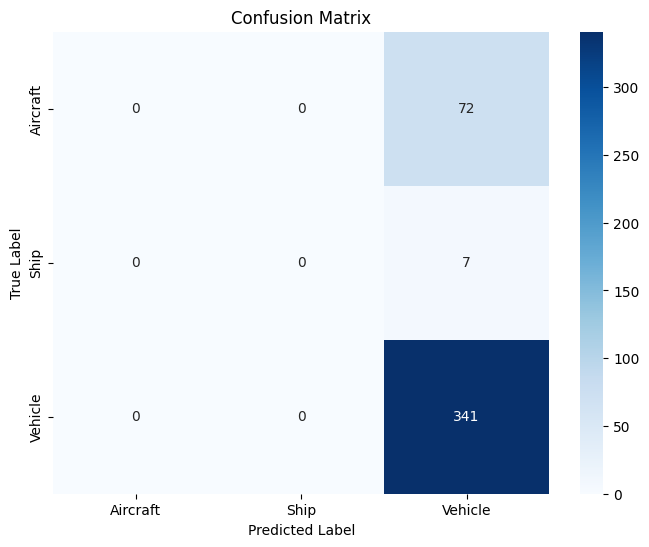

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Class names (adjust according to your dataset)
class_names = ['Aircraft', 'Ship', 'Vehicle']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


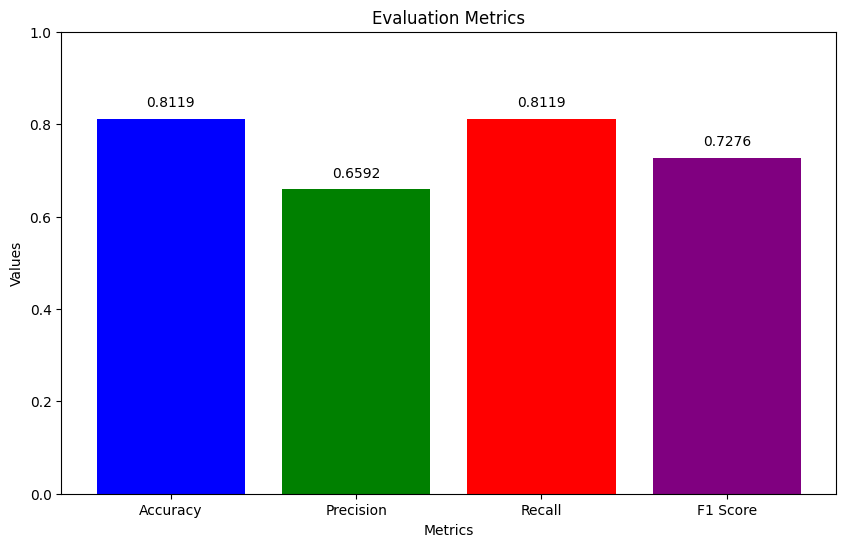

In [ ]:
def plot_metrics_bar_chart(accuracy, precision, recall, f1):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.ylim(0, 1)
    plt.title('Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_metrics_bar_chart(train_accuracy, train_precision, train_recall, train_f1)


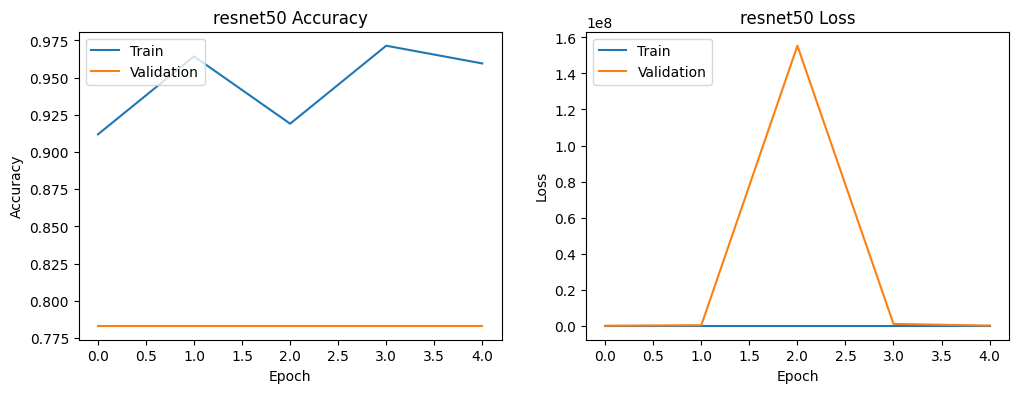

In [ ]:
plot_training_history(resnet50_history, 'resnet50')

# Comparison

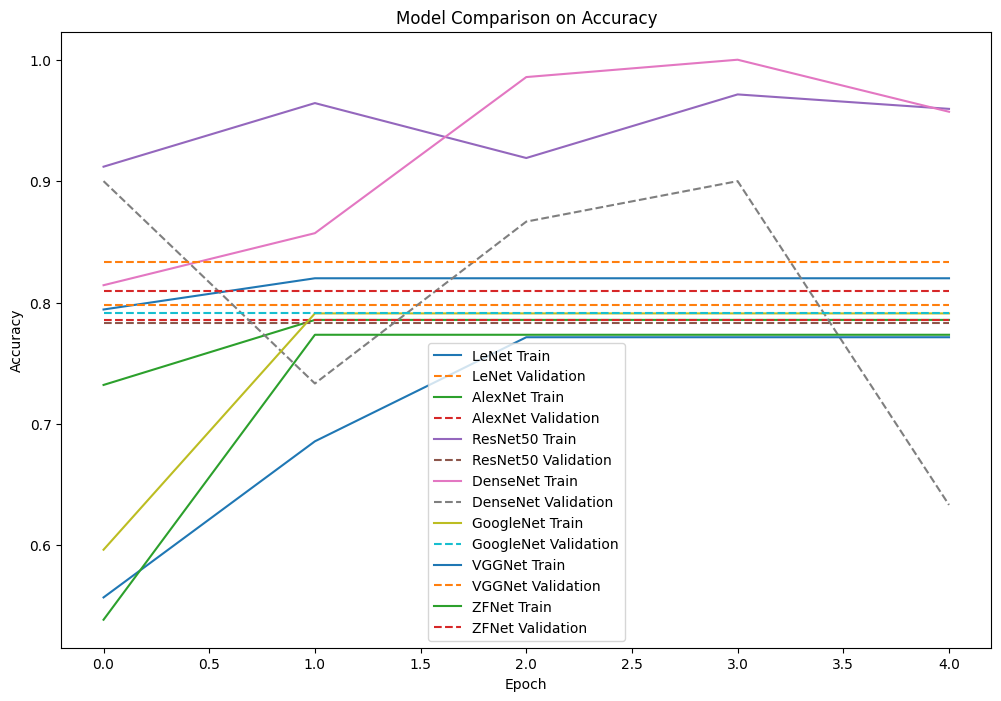

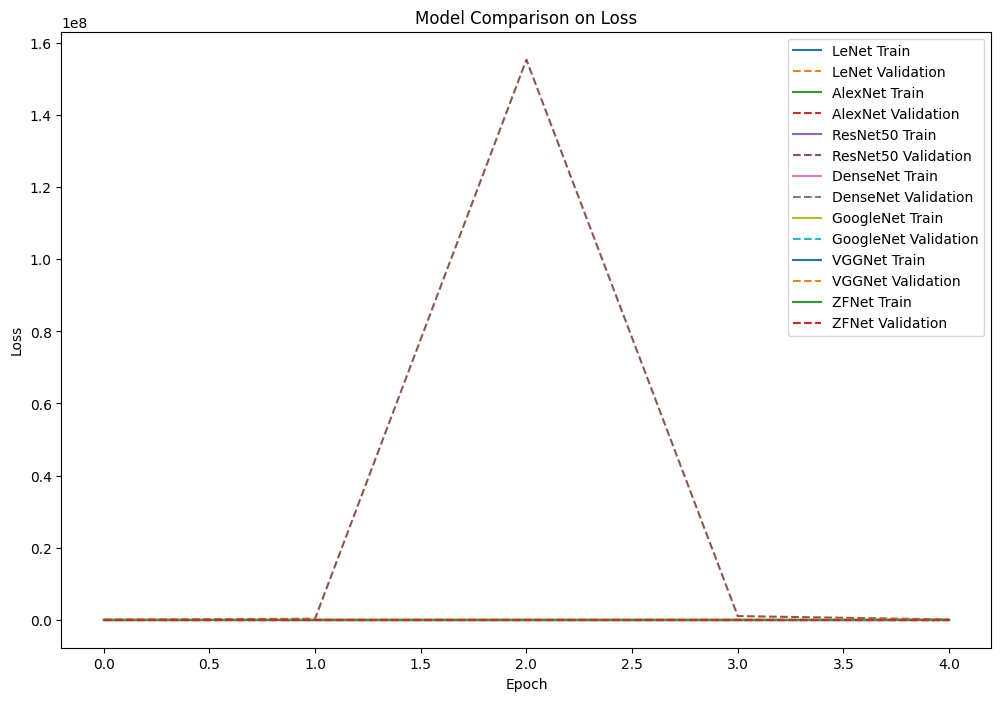

In [ ]:
def plot_comparison_graph(histories, model_names, metric):
    plt.figure(figsize=(12, 8))

    for history, model_name in zip(histories, model_names):
        plt.plot(history.history[metric], label=f'{model_name} Train')
        plt.plot(history.history[f'val_{metric}'], label=f'{model_name} Validation', linestyle='dashed')

    plt.title(f'Model Comparison on {metric.capitalize()}')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()
# List of histories and model names
histories = [lenet_history, alexnet_history, resnet50_history, history, googlenet_history, vggnet_history, zfnet_history]
model_names = ['LeNet', 'AlexNet', 'ResNet50', 'DenseNet', 'GoogleNet', 'VGGNet', 'ZFNet']

# Plot comparison for accuracy
plot_comparison_graph(histories, model_names, 'accuracy')

# Plot comparison for loss
plot_comparison_graph(histories, model_names, 'loss')



In [ ]:
import matplotlib.pyplot as plt

# Function to get the final validation accuracy for a model
def get_final_val_accuracy(history):
    return history.history['accuracy'][-1]

# Extract the final validation accuracy for each model
lenet_val_acc = get_final_val_accuracy(lenet_history)
alexnet_val_acc = get_final_val_accuracy(alexnet_history)
resnet50_val_acc = get_final_val_accuracy(resnet50_history)
densenet_val_acc = get_final_val_accuracy(history)  # assuming 'history' is the DenseNet history
googlenet_val_acc = get_final_val_accuracy(googlenet_history)
vggnet_val_acc = get_final_val_accuracy(vggnet_history)
zfnet_val_acc = get_final_val_accuracy(zfnet_history)

# List of model names and their corresponding validation accuracies
model_names = ['LeNet', 'AlexNet', 'ResNet50', 'DenseNet', 'GoogleNet', 'VGGNet', 'ZFNet']
val_accuracies = [lenet_val_acc, alexnet_val_acc, resnet50_val_acc, densenet_val_acc, googlenet_val_acc, vggnet_val_acc, zfnet_val_acc]


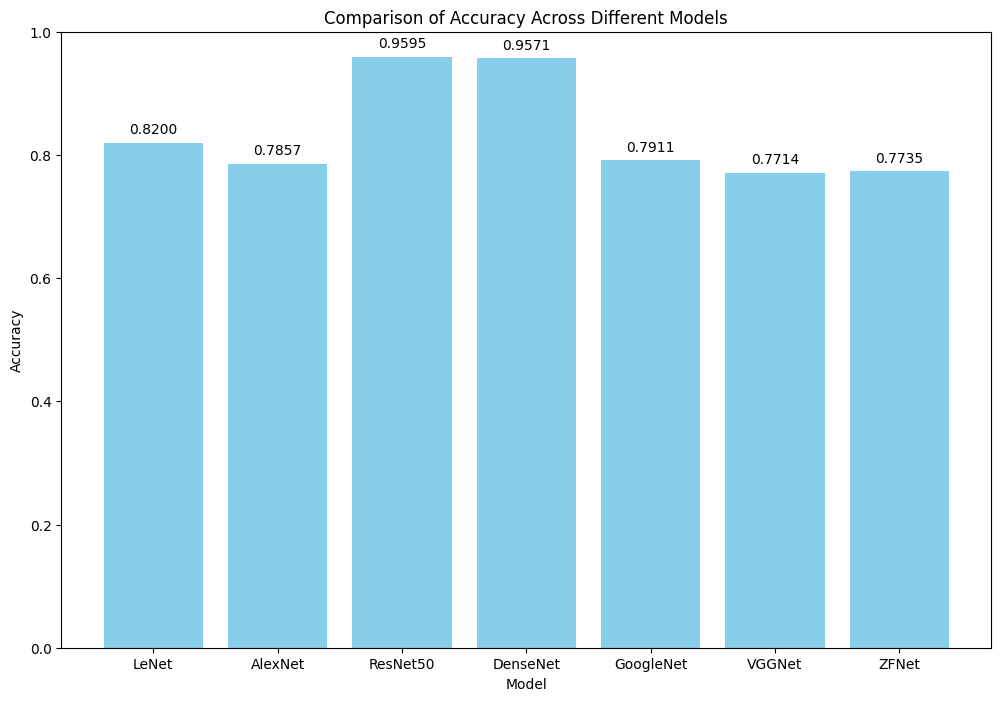

In [ ]:
def plot_accuracy_comparison(model_names, val_accuracies):
    plt.figure(figsize=(12, 8))
    plt.bar(model_names, val_accuracies, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Accuracy Across Different Models')
    plt.ylim(0, 1)  # assuming accuracy is between 0 and 1
    for i, v in enumerate(val_accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
    plt.show()

# Plot the bar chart
plot_accuracy_comparison(model_names, val_accuracies)


# Prediction

1/1 [==============================] - 0s 127ms/step
Image 1: Predicted label: 2, Class: vehicle
Image 2: Predicted label: 2, Class: vehicle
Image 3: Predicted label: 2, Class: vehicle


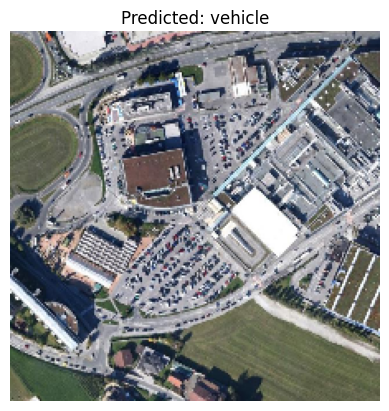

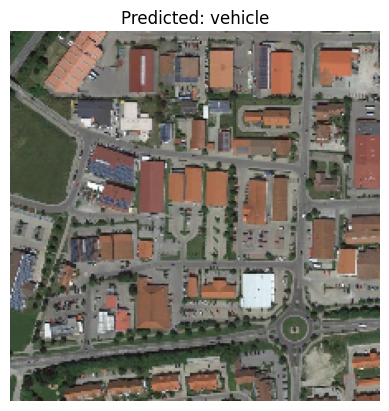

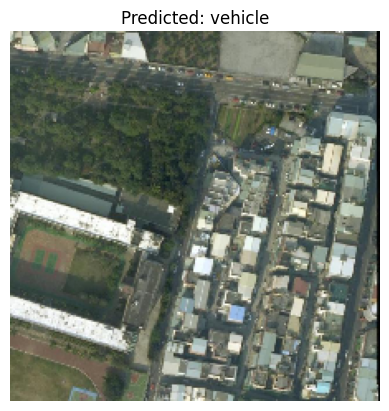

In [ ]:
# Classify 3 random images from the test dataset
class_labels = {0: 'aircraft', 1: 'ship', 2: 'vehicle'}

random_indices = np.random.choice(len(test_images), 3, replace=False)
random_images = test_images[random_indices]

predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

for i, pred_label in enumerate(predicted_labels):
    print(f"Image {i+1}: Predicted label: {pred_label}, Class: {class_labels[pred_label]}")

for i, image in enumerate(random_images):
    plt.imshow(image)
    plt.title(f"Predicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()